In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(filepath_or_buffer='../data/irisdataset.csv')

In [4]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(149, 5)

In [8]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

In [61]:
sns.set_theme(palette='rocket', font='Roboto Mono', font_scale=0.8)

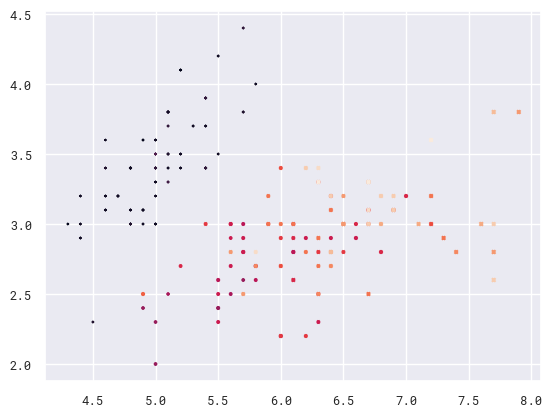

In [62]:
plt.scatter(df['Sepal_Length'], df['Sepal_Width'], s=df['Petal_Length'], c=df['Petal_Width'], marker='x')
plt.show()

### Graph showing relationship between sepal_length and sepal_width

In [63]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

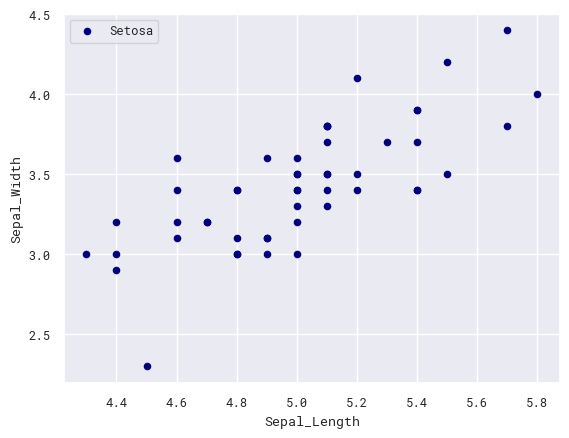

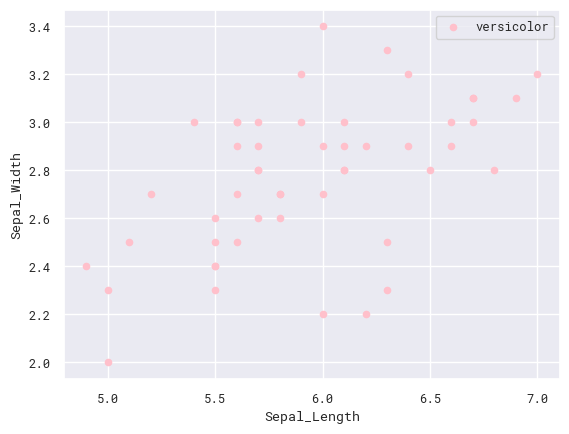

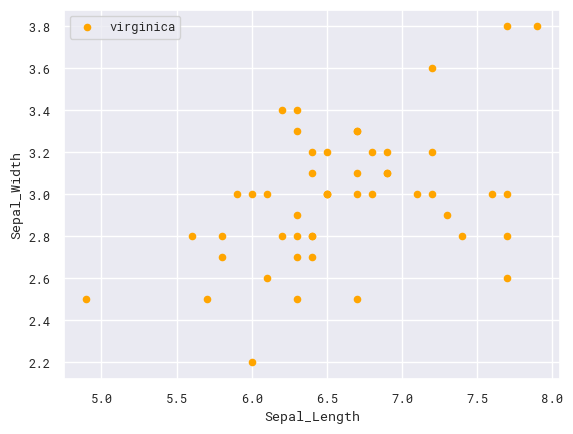

In [64]:
fig = df[df.Class == 'Setosa'].plot(kind='scatter', x='Sepal_Length', y='Sepal_Width', 
                              color='navy', label='Setosa')
df[df.Class == 'Versicolor'].plot(kind='scatter', x='Sepal_Length', y='Sepal_Width', 
                                color='pink', label='versicolor')
df[df.Class == 'Virginica'].plot(kind='scatter', x='Sepal_Length', y='Sepal_Width', 
                                color='orange', label='virginica')


To view all these 3 graphs as a single graph, we can do as follows: 

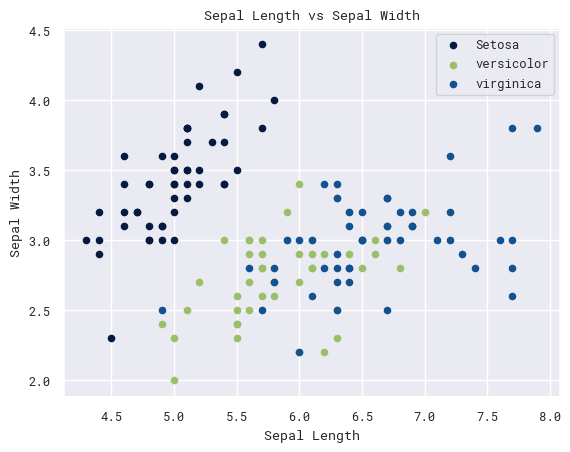

In [65]:
fig = df[df.Class == 'Setosa'].plot(kind='scatter', x='Sepal_Length', y='Sepal_Width', 
                              color='#061A40', label='Setosa')
df[df.Class == 'Versicolor'].plot(kind='scatter', x='Sepal_Length', y='Sepal_Width', 
                                color='#9BBF69', label='versicolor', ax=fig)
df[df.Class == 'Virginica'].plot(kind='scatter', x='Sepal_Length', y='Sepal_Width', 
                                color='#125290', label='virginica', ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Sepal Width')
plt.show()

### Graph showing relationship between petal_length and petal_width

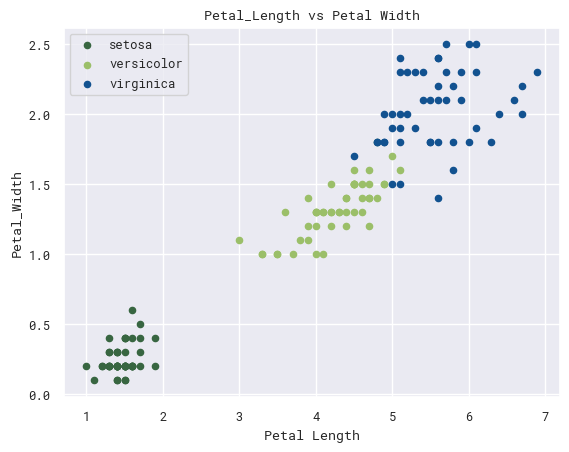

In [66]:
fig = df[df['Class'] == 'Setosa'].plot(kind='scatter', x='Petal_Length', 
                                       y='Petal_Width', color="#386641", label='setosa')
df[df.Class == 'Versicolor'].plot(kind='scatter', x='Petal_Length', y='Petal_Width', 
                                color='#9BBF69', label='versicolor', ax=fig)
df[df.Class == 'Virginica'].plot(kind='scatter', x='Petal_Length', y='Petal_Width', 
                                color='#125290', label='virginica', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal_Width')
fig.set_title('Petal_Length vs Petal Width')
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

### How length and width are distributed?

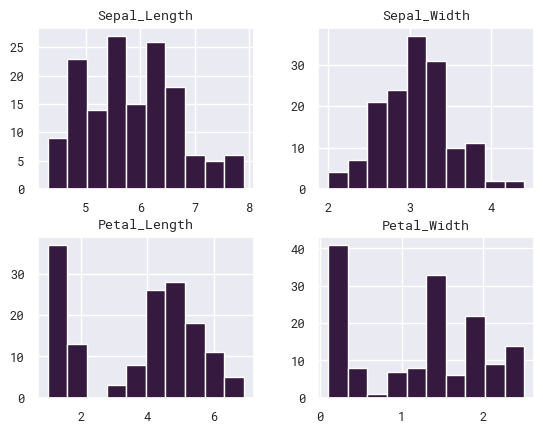

In [69]:
df.hist()
plt.show()

### How length & width vary wrt class/species

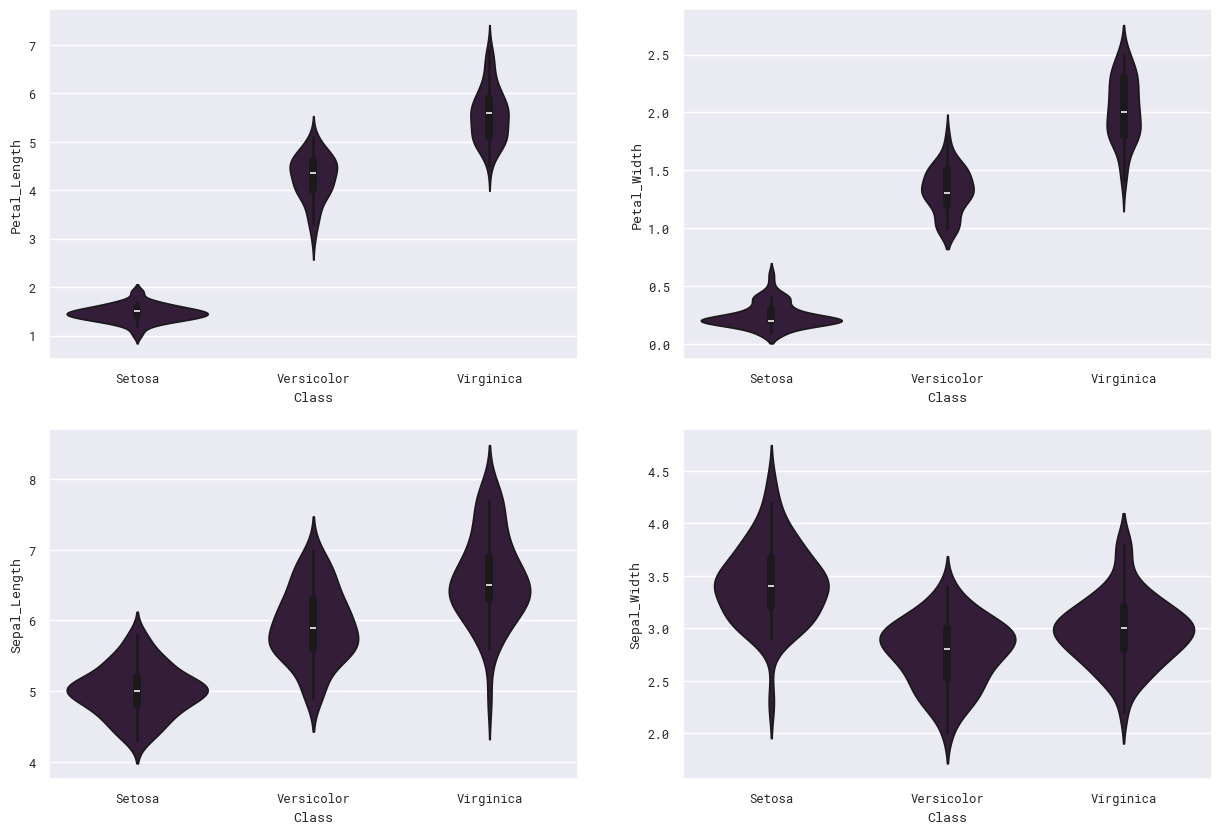

In [77]:
# create figure to display 4 graph as subplots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) # 2-column, 2-row, 1-place
sns.violinplot(x='Class', y='Petal_Length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Class', y='Petal_Width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Class', y='Sepal_Length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Class', y='Sepal_Width', data=df)
plt.show()

The violin plot helps to under the density. The thinner part conveys higher density whereas thicker part conveys higher density.

#### How to read violin plot?
https://mode.com/blog/violin-plot-examples

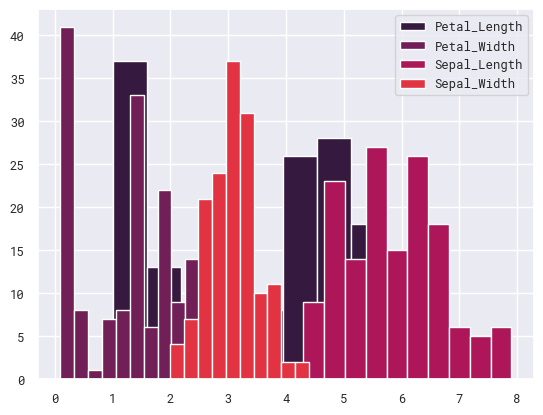

In [94]:
plt.hist(x='Petal_Length', data=df, label='Petal_Length')
plt.hist(x='Petal_Width', data=df, label='Petal_Width')
plt.hist(x='Sepal_Length', data=df, label='Sepal_Length')
plt.hist(x='Sepal_Width', data=df, label='Sepal_Width')
plt.legend()
plt.show()

#### How Class distributed wrt length/width?

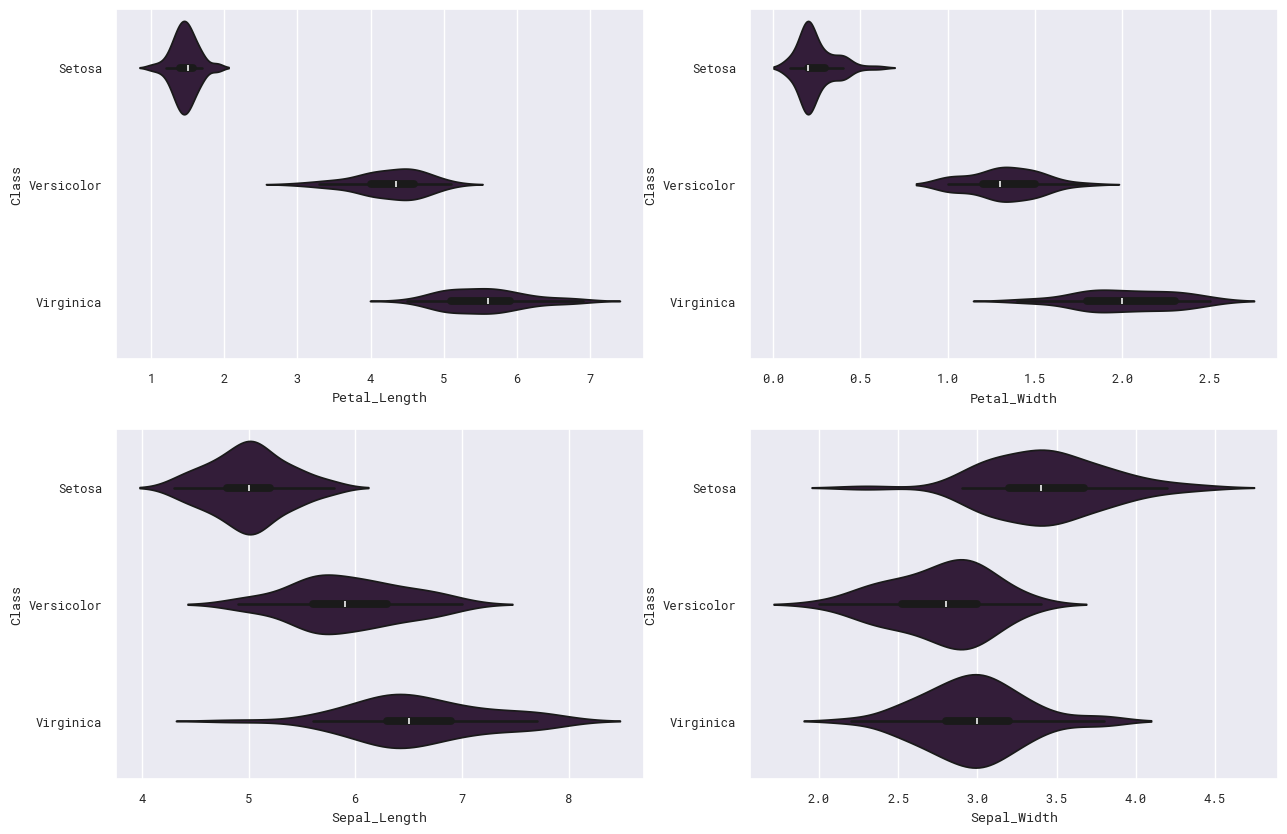

In [95]:
# create figure to display 4 graph as subplots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) # 2-column, 2-row, 1-place
sns.violinplot(x='Petal_Length', y='Class', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Petal_Width', y='Class', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Sepal_Length', y='Class', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Sepal_Width', y='Class', data=df)
plt.show()

Based on the observations, it seems that using the feature “petal length” can effectively separate the “setosa” species from the others. However, using “sepal length” and “sepal width” does not provide clear separation between the different flower types.

Additionally, it appears that the distribution of “setosa” in the feature “petal width” is not well-defined. Therefore, it is concluded that “petal length” is the most useful feature for distinguishing “setosa” from the other species.

```python
Syntax: seaborn.histplot(data, x, y, hue, stat, bins, binwidth, discrete, kde, log_scale)
```

Parameters:
```python
data: input data in the form of Dataframe or Numpy array
x, y (optional): key of the data to be positioned on the x and y axes respectively
hue (optional): semantic data key which is mapped to determine the color of plot elements
stat (optional): count, frequency, density or probability
Return: This method returns the matplotlib axes with the plot drawn on it.
```

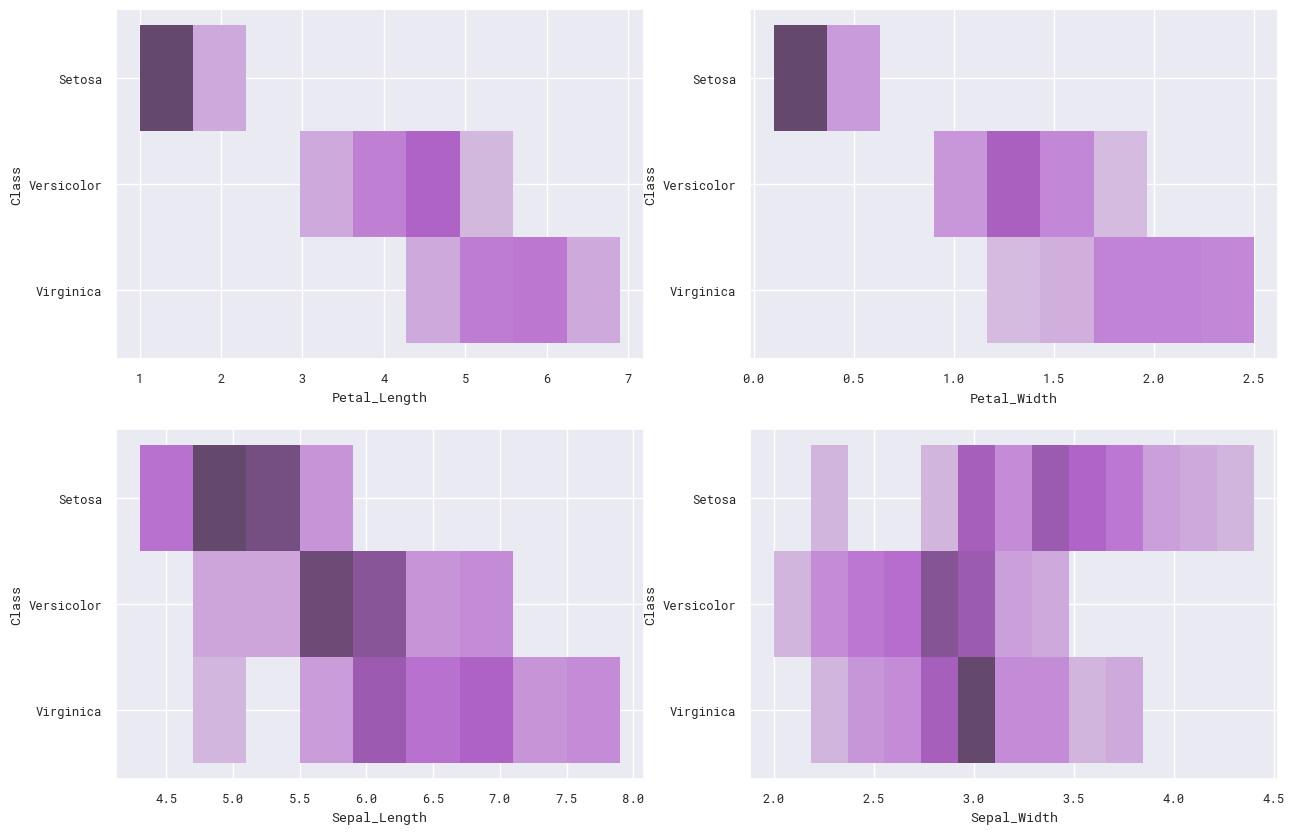

In [96]:
# create figure to display 4 graph as subplots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) # 2-column, 2-row, 1-place
sns.histplot(x='Petal_Length', y='Class', data=df)
plt.subplot(2,2,2)
sns.histplot(x='Petal_Width', y='Class', data=df)
plt.subplot(2,2,3)
sns.histplot(x='Sepal_Length', y='Class', data=df)
plt.subplot(2,2,4)
sns.histplot(x='Sepal_Width', y='Class', data=df)
plt.show()

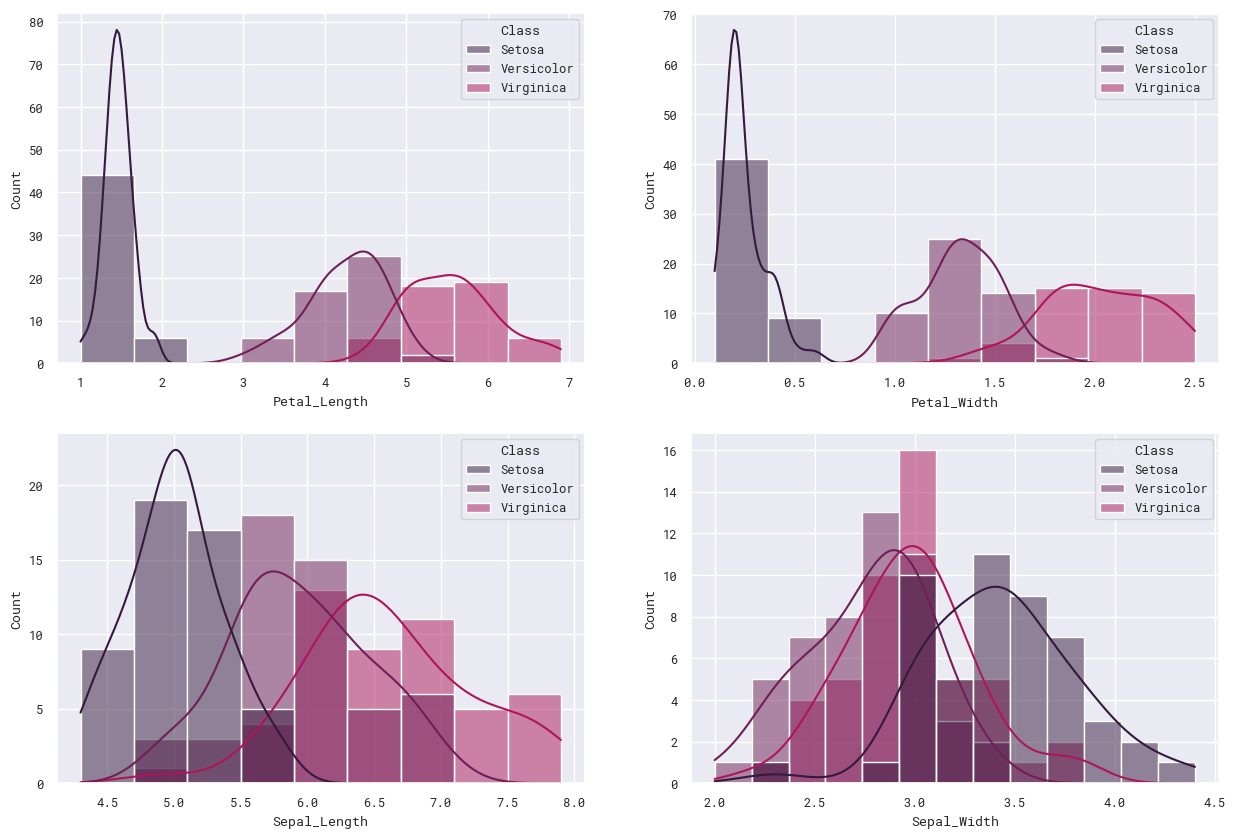

In [106]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x='Petal_Length', hue='Class', data=df, kde=True)
plt.subplot(2,2,2)
sns.histplot(x='Petal_Width', data=df, kde=True, hue='Class')
plt.subplot(2,2,3)
sns.histplot(x='Sepal_Length', data=df, kde=True, hue='Class')
plt.subplot(2,2,4)
sns.histplot(data=df, x='Sepal_Width', kde=True, hue='Class')
plt.show()

Based on the observations, it seems that using the feature `“petal length”` can effectively separate the `“setosa”` species from the others. However, using `“sepal length”` and `“sepal width”` does not provide clear separation between the different flower types.

Additionally, it appears that the distribution of `“setosa”` in the feature `“petal width”` is not well-defined. Therefore, it is concluded that `“petal length”` is the most useful feature for distinguishing `“setosa”` from the other species.

### Selecting Independent(i/p or features) and Dependent(o/p or target) variables

In [109]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

In [111]:
df.iloc[:,:4]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [113]:
# another way of selection independent columns
df[df.columns[:4]]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [114]:
X = df.iloc[:, :4]

In [115]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
type(X)

pandas.core.frame.DataFrame

In [120]:
# selecting dependent variable
y = df.iloc[:,-1]

In [122]:
y.values

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [123]:
type(y)

pandas.core.series.Series

### Splitting Dataset Into Training & Test Data

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [128]:
X_train.shape

(119, 4)

In [129]:
X_test.shape

(30, 4)

In [130]:
y_train.shape

(119,)

In [131]:
y_test.shape

(30,)

### Scaling Independent Data

Scaling helps to bring the dataset into the range of -1 to 1.
It is not mandatory but it is always good to scale our dataset before processing

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

In [136]:
X_train_scaled = scaler.fit_transform(X_train)

In [137]:
X_train_scaled

array([[-0.37943889, -1.65033038,  0.16594394,  0.18990299],
       [-1.33254131,  0.34234587, -1.36617644, -1.29861803],
       [ 0.33538793, -0.54328802,  0.16594394,  0.18990299],
       [ 0.57366354, -1.20751344,  0.73339594,  1.00182354],
       [ 1.64590377, -0.10047107,  1.18735753,  0.59586326],
       [-0.8559901 ,  1.00657129, -1.30943124, -1.29861803],
       [ 0.09711233, -0.10047107,  0.79014114,  0.86650345],
       [ 0.81193914, -0.10047107,  1.01712193,  0.86650345],
       [ 1.28849036,  0.34234587,  1.13061233,  1.54310391],
       [ 2.12245498, -0.10047107,  1.64131912,  1.27246373],
       [ 0.33538793, -0.54328802,  0.56316034,  0.05458289],
       [ 0.69280134,  0.34234587,  0.44966994,  0.46054317],
       [-1.0942657 ,  0.1209374 , -1.25268604, -1.29861803],
       [ 1.05021475,  0.1209374 ,  0.56316034,  0.46054317],
       [ 0.57366354, -1.65033038,  0.39292474,  0.18990299],
       [ 2.24159278, -0.10047107,  1.35759313,  1.54310391],
       [-0.9751279 , -2.

In [138]:
type(X_train_scaled)

numpy.ndarray

In [139]:
X_test_scaled = scaler.transform(X_test)

In [141]:
X_test_scaled.shape

(30, 4)

### Training Dataset Using Classifier Models

As we know, the given problem is a classification problem we will be using classification algorithms to build our model.

There are various classification algorithms such as `Logistic Regression`, `DecisionTreeClassifier`, `KNeigborsClassifier`, `RandomForestClassifier`

We will try to use all of them and see which algorithm perform better to create our model

#### Steps To Be followed When Applying an Algorithm

- Split the dataset into training and testing dataset. 
- The testing dataset is generally smaller than training one as it will help in training the model better.
- Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
- Then pass the training dataset to the algorithm to train it. We use the `.fit()` method
- Then pass the testing data to the trained algorithm to predict the outcome. We use the `.predict()` method.
- We then check the accuracy by passing the predicted outcome and the actual output to the model.

#### Training Model Using Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr = LogisticRegression()

In [146]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [148]:
y_predict = lr.predict(X_test_scaled)

In [149]:
pd.DataFrame({
    'y_predict': y_predict,
    'y_test': y_test
})

,y_predict,y_test
140,Virginica,Virginica
18,Setosa,Setosa
35,Setosa,Setosa
26,Setosa,Setosa
79,Versicolor,Versicolor
109,Virginica,Virginica
115,Virginica,Virginica
138,Virginica,Virginica
92,Versicolor,Versicolor
108,Virginica,Virginica


In [150]:
# check the accuracy of logistic regression model
from sklearn.metrics import accuracy_score

In [151]:
accuracy_score(y_predict, y_test)

0.9666666666666667

Using Logistic Regression algorithm, we have created a model that has accuracy score of `96.66% ` which is really an efficient model we can say

#### Creating Model Using RandomForestClassifier Algorithm

In [152]:
from sklearn.ensemble import RandomForestClassifier

When we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. Thus, features selection should be done carefully. This dataset has less features, but still we will see the correlation.

In [158]:
X_train.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.116814,0.867919,0.816095
Sepal_Width,-0.116814,1.000000,-0.437949,-0.388038
Petal_Length,0.867919,-0.437949,1.000000,0.962338
Petal_Width,0.816095,-0.388038,0.962338,1.000000


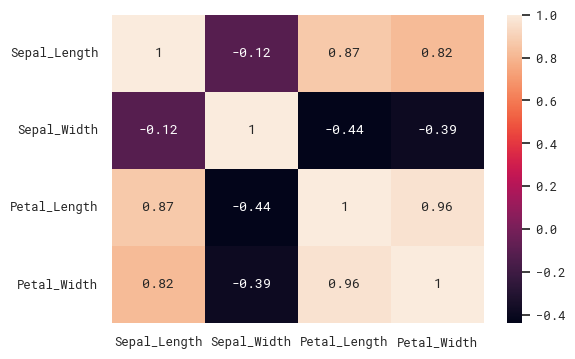

In [163]:
plt.figure(figsize=(6,4))
sns.heatmap(data=X_train.corr(), annot=True)
plt.show()

**Observation**

The Sepal Width and Length are not correlated with value of `-0.12`. The Petal Width and Length are highly correlated with value of `0.96`

We will use all the features for training the algorithm and check the accuracy.

Then we will use one Petal Feature and one Sepal Feature to check the accuracy of the algorithm, as we are using only two features that are not correlated. Thus, we can have a variance in the dataset which may help in better accuracy. We will check it later.

#### Splitting The Data into Training And Testing Dataset

In [164]:
df.shape

(149, 5)

In [177]:
train, test = train_test_split(df, test_size=0.3)
# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

In [178]:
train.shape

(104, 5)

In [179]:
train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
80,5.5,2.4,3.8,1.1,Versicolor
129,7.2,3.0,5.8,1.6,Virginica
94,5.6,2.7,4.2,1.3,Versicolor
10,5.4,3.7,1.5,0.2,Setosa
95,5.7,3.0,4.2,1.2,Versicolor


In [180]:
test.shape

(45, 5)

In [181]:
test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
140,6.7,3.1,5.6,2.4,Virginica
42,4.4,3.2,1.3,0.2,Setosa
139,6.9,3.1,5.4,2.1,Virginica
50,7.0,3.2,4.7,1.4,Versicolor
84,5.4,3.0,4.5,1.5,Versicolor


In [182]:
# taking the training dataset
train.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

In [183]:
X_train = train[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]

In [184]:
X_train

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
80,5.5,2.4,3.8,1.1
129,7.2,3.0,5.8,1.6
94,5.6,2.7,4.2,1.3
10,5.4,3.7,1.5,0.2
95,5.7,3.0,4.2,1.2
...,...,...,...,...
52,6.9,3.1,4.9,1.5
89,5.5,2.5,4.0,1.3
86,6.7,3.1,4.7,1.5
65,6.7,3.1,4.4,1.4


In [185]:
X_test = test[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]

In [186]:
X_test

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
140,6.7,3.1,5.6,2.4
42,4.4,3.2,1.3,0.2
139,6.9,3.1,5.4,2.1
50,7.0,3.2,4.7,1.4
84,5.4,3.0,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
5,5.4,3.9,1.7,0.4
45,4.8,3.0,1.4,0.3
125,7.2,3.2,6.0,1.8


In [188]:
X_train.shape

(104, 4)

In [189]:
X_test.shape

(45, 4)

In [190]:
# output of our training data
y_train = train.Class

In [192]:
y_train.shape

(104,)

In [193]:
# output of our test data
y_test = test.Class

In [194]:
y_test.shape

(45,)

In [195]:
# Checking Training & Test Dataset
X_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
80,5.5,2.4,3.8,1.1
129,7.2,3.0,5.8,1.6
94,5.6,2.7,4.2,1.3
10,5.4,3.7,1.5,0.2
95,5.7,3.0,4.2,1.2


In [196]:
X_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
140,6.7,3.1,5.6,2.4
42,4.4,3.2,1.3,0.2
139,6.9,3.1,5.4,2.1
50,7.0,3.2,4.7,1.4
84,5.4,3.0,4.5,1.5


#### Training Dataset Using SupportVectorMachine Algorithm

In [199]:
from sklearn import svm

In [201]:
# Instantiate the model
svm_model = svm.SVC()

In [202]:
# we train the algorithm with the training data and the training output
svm_model.fit(X_train, y_train)

SVC()

In [204]:
# passing test data to model and do prediction
y_predict = svm_model.predict(X_test)

In [205]:
y_predict

array(['Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Virginica', 'Setosa',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa'], dtype=object)

In [206]:
pd.DataFrame({
    'y_predict': y_predict,
    'y_test': y_test
})

,y_predict,y_test
140,Virginica,Virginica
42,Setosa,Setosa
139,Virginica,Virginica
50,Versicolor,Versicolor
84,Versicolor,Versicolor
76,Versicolor,Versicolor
31,Setosa,Setosa
5,Setosa,Setosa
45,Setosa,Setosa
125,Virginica,Virginica


In [207]:
#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output
print(f'Accuracy score of SVM algorithm: {accuracy_score(y_predict, y_test)}')

Accuracy score of SVM algorithm: 1.0


`SVM` is giving very good accuracy, and it is better than the `Logistic Regression` we tried above. We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

#### Training Decision Tree Algorithm Using Training Data Input And Output

In [208]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
dt_model = DecisionTreeClassifier()

In [210]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [212]:
y_predict = dt_model.predict(X_test)

In [213]:
pd.DataFrame({
    'y_predict': y_predict,
    'y_test': y_test
})

,y_predict,y_test
140,Virginica,Virginica
42,Setosa,Setosa
139,Virginica,Virginica
50,Versicolor,Versicolor
84,Versicolor,Versicolor
76,Versicolor,Versicolor
31,Setosa,Setosa
5,Setosa,Setosa
45,Setosa,Setosa
125,Virginica,Virginica


In [214]:
# Accuracy score of Decision Tree Model
print(f'The Accuracy Score of Decision Tree Model: {accuracy_score(y_predict, y_test)}')

The Accuracy Score of Decision Tree Model: 1.0


#### Training K-Nearest Neigbours Algorithm Using Training Data Input And Output

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
#this examines 3 neighbours for putting the new data into a class
kn_model = KNeighborsClassifier(n_neighbors=3)

In [217]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [219]:
y_predict = kn_model.predict(X_test)

In [220]:
pd.DataFrame({
    'y_predict': y_predict,
    'y_test': y_test
})

,y_predict,y_test
140,Virginica,Virginica
42,Setosa,Setosa
139,Virginica,Virginica
50,Versicolor,Versicolor
84,Versicolor,Versicolor
76,Versicolor,Versicolor
31,Setosa,Setosa
5,Setosa,Setosa
45,Setosa,Setosa
125,Virginica,Virginica


In [222]:
print('The accuracy of the KNN is', accuracy_score(y_predict,y_test))

The accuracy of the KNN is 1.0


#### Checking the accuracy of KNN for various values of n

In [243]:

# to store the accuracy score for different values of n_neighbors
a = []
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    acc_score = accuracy_score(y_predict, y_test)
    a.append(acc_score)
print(a)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [244]:
n_neighbors = list(range(1,11))

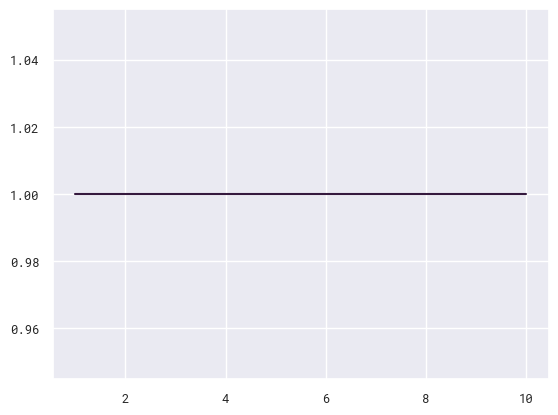

In [245]:
plt.plot(n_neighbors, a)

Above is the graph showing the accuracy for the KNN models using different values of n

We have used all the features of iris dataset in above models. Now we will use Petals and Sepals
separately

#### Creating Petals and Sepals Training Data

In [251]:
petals_df = df[['Petal_Length','Petal_Width', 'Class']]
sepals_df = df[['Sepal_Length','Sepal_Width', 'Class']]

In [252]:
petals_df.head()

,Petal_Length,Petal_Width,Class
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa


In [253]:
sepals_df.head()

,Sepal_Length,Sepal_Width,Class
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


In [256]:
train, test = train_test_split(petals_df, test_size=0.3, random_state=0)
X_train_p = train[['Petal_Length', 'Petal_Width']]
y_train_p = train.Class
X_test_p = test[['Petal_Length', 'Petal_Width']]
y_test_p = test.Class

In [279]:
train, test = train_test_split(sepals_df, test_size=0.3, random_state=0)
X_train_s = train[['Sepal_Length', 'Sepal_Width']]
X_test_s = test[['Sepal_Length', 'Sepal_Width']]
y_train_s = train.Class
y_test_s = test.Class

In [280]:
X_train_p.head()

,Petal_Length,Petal_Width
116,5.5,1.8
66,4.5,1.5
78,4.5,1.5
71,4.0,1.3
131,6.4,2.0


In [281]:
X_train_s.head()

,Sepal_Length,Sepal_Width
116,6.5,3.0
66,5.6,3.0
78,6.0,2.9
71,6.1,2.8
131,7.9,3.8


#### Support Vector Machine Algorithm

In [289]:
svn_model = svm.SVC()
svn_model.fit(X_train_p, y_train_p)
y_predict = svn_model.predict(X_test_p)
acc_score = accuracy_score(y_predict, y_test_p)

In [290]:
print('The accuracy of the SVM using Petals is:',acc_score)

The accuracy of the SVM using Petals is: 1.0


In [284]:
svn_model = svm.SVC()
svn_model.fit(X_train_s, y_train_s)
y_predict = svn_model.predict(X_test_s)
acc_score = accuracy_score(y_predict, y_test_s)

In [285]:
print('The accuracy of the SVM using Sepals is:',acc_score)

The accuracy of the SVM using Sepals is: 0.8222222222222222


#### Logistic Regression Algorithm

In [291]:
lr_model = LogisticRegression()
lr_model.fit(X_train_p, y_train_p)
y_predict = lr_model.predict(X_test_p)
acc_score = accuracy_score(y_predict, y_test_p)

In [292]:
print('The accuracy of the Logistic Regression using Petals is:',acc_score)

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777


In [293]:
lr_model = LogisticRegression()
lr_model.fit(X_train_s, y_train_s)
y_predict = lr_model.predict(X_test_s)
acc_score = accuracy_score(y_predict, y_test_s)

In [294]:
print('The accuracy of the Logistic Regression using Sepals is:',acc_score)

The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


#### Decision Tree Algorithm

In [297]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_p, y_train_p)
y_predict = dt_model.predict(X_test_p)
acc_score = accuracy_score(y_predict, y_test_p)

In [298]:
print('The accuracy of the Decision Tree using Petals is:', acc_score)

The accuracy of the Decision Tree using Petals is: 0.9777777777777777


In [299]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_s, y_train_s)
y_predict = dt_model.predict(X_test_s)
acc_score = accuracy_score(y_predict, y_test_s)

In [300]:
print('The accuracy of the Decision Tree using Sepals is:', acc_score)

The accuracy of the Decision Tree using Sepals is: 0.7333333333333333


#### K-Nearest Neighbors Algorithm

In [301]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_p, y_train_p)
y_predict = knn_model.predict(X_test_p)
acc_score = accuracy_score(y_predict, y_test_p)

In [302]:
print('The accuracy of the KNN using Petals is:', acc_score)

The accuracy of the KNN using Petals is: 0.9777777777777777


In [303]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_s, y_train_s)
y_predict = knn_model.predict(X_test_s)
acc_score = accuracy_score(y_predict, y_test_s)

In [304]:
print('The accuracy of the KNN using Sepals is:', acc_score)

The accuracy of the KNN using Sepals is: 0.8


**Observations:**

- Using Petals over Sepal for training, the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.